## A Problem with Presidents

### 1. Data Pre-processing

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file into a dataframe
data = pd.read_csv('./U.S. Presidents Birth and Death Information - Sheet1.csv')

# Checking the entire data
data

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C."
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee"
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York"
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C."
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va."


In [3]:
# Dropping the last row as it is just a reference row and saving it in df
# From here, we will be using df for our analysis
df = data.drop(data.index[-1])
df.tail()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
40,Bill Clinton,"Aug 19, 1946","Hope, Arkansas",NaN,NaN
41,George W. Bush,"July 6, 1946","New Haven, Conn.",NaN,NaN
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",NaN,NaN
43,Donald Trump,"June 14, 1946","New York, New York",NaN,NaN
44,Joe Biden,"Nov 20, 1942","Scranton, Pa.",NaN,NaN


In [4]:
# Check the data type of each attribute
df.dtypes

PRESIDENT            object
BIRTH DATE           object
BIRTH PLACE          object
DEATH DATE           object
LOCATION OF DEATH    object
dtype: object

In [5]:
# Checking for NaN values in every column
df.isnull().any()

PRESIDENT            False
BIRTH DATE           False
BIRTH PLACE          False
DEATH DATE            True
LOCATION OF DEATH     True
dtype: bool

In [6]:
# Coverting the date columns to the datetime format
# There are NaN values in DEATH DATE, handling it by replacing the NaN values with the current date
# These are not missing values, but we need to handle the NaN values in order for further calculations

today_date = pd.Timestamp.now().date()
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'].fillna(today_date))

df.tail()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
40,Bill Clinton,1946-08-19,"Hope, Arkansas",2023-06-09,NaN
41,George W. Bush,1946-07-06,"New Haven, Conn.",2023-06-09,NaN
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",2023-06-09,NaN
43,Donald Trump,1946-06-14,"New York, New York",2023-06-09,NaN
44,Joe Biden,1942-11-20,"Scranton, Pa.",2023-06-09,NaN


In [7]:
# Verifying the type of BIRTH DATE and DEATH DATE
df.dtypes

PRESIDENT                    object
BIRTH DATE           datetime64[ns]
BIRTH PLACE                  object
DEATH DATE           datetime64[ns]
LOCATION OF DEATH            object
dtype: object

### 2. Feature Engineering

In [8]:
# Adding new variables: year_of_birth, lived_days, lived_months, lived_years
"""
    Note: Assuming 30.44 to be the average number of days in a month as average number
    of days in a year is around 365.25
"""

df['year_of_birth'] = df['BIRTH DATE'].dt.year
df['lived_days'] = (df['DEATH DATE'] - df['BIRTH DATE']).dt.days
df['lived_months'] = (df['lived_days'] // 30.44).astype(int)
df['lived_years'] = df['lived_days'] // 365

df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_months,lived_years
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,24767,813,67
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,33119,1088,90
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,30397,998,83
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,31150,1023,85
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,26729,878,73


In [9]:
# Creating a well formatted table ranking the top 10 Presidents from longest lived to shortest lived
# Adding an extra column 'Alive'. Yes, when place of death is present, else No

top_10_longest = df.sort_values('lived_days', ascending = False, ignore_index= True).head(10)
top_10_longest['Alive'] = np.where(top_10_longest['LOCATION OF DEATH'].isnull(), 'Yes', 'No')
top_10_longest = top_10_longest[['PRESIDENT','lived_years', 'lived_months','lived_days', 'Alive']]

# Renaming the columns
top_10_longest.rename(columns={"lived_years": "Age",
                               "lived_months": "Months lived",
                               "lived_days": "Days lived"}, inplace=True)

# Converting this table into a csv file
top_10_longest.to_csv("Top 10 longest lived", index = False)

print("TOP 10 LONGEST LIVED PRESIDENTS")
top_10_longest

TOP 10 LONGEST LIVED PRESIDENTS


,PRESIDENT,Age,Months lived,Days lived,Alive
0,Jimmy Carter,98,1184,36045,Yes
1,George Bush,94,1133,34504,No
2,Gerald Ford,93,1121,34133,No
3,Ronald Reagan,93,1119,34088,No
4,John Adams,90,1088,33119,No
5,Herbert Hoover,90,1082,32943,No
6,Harry S. Truman,88,1063,32373,No
7,James Madison,85,1023,31150,No
8,Thomas Jefferson,83,998,30397,No
9,Richard Nixon,81,975,29688,No


In [10]:
# Creating a table ranking the top 10 Presidents from shorted lived to longest lived
# Adding an extra column 'Alive'. Yes, when place of death is present, else No

top_10_shortest = df.sort_values('lived_days', ascending = True, ignore_index= True).head(10)
top_10_shortest['Alive'] = np.where(top_10_shortest['LOCATION OF DEATH'].isnull(), 'Yes', 'No')
top_10_shortest = top_10_shortest[['PRESIDENT','lived_years', 'lived_months','lived_days', 'Alive']]

# Renaming the columns
top_10_shortest.rename(columns={"lived_years": "Age",
                               "lived_months": "Months lived",
                               "lived_days": "Days lived"}, inplace=True)

# Converting this table into a csv file
top_10_shortest.to_csv("Top 10 shortest lived", index = False)

print("TOP 10 SHORTEST LIVED PRESIDENTS")
top_10_shortest

TOP 10 SHORTEST LIVED PRESIDENTS


,PRESIDENT,Age,Months lived,Days lived,Alive
0,John F. Kennedy,46,557,16978,No
1,James A. Garfield,49,597,18202,No
2,James K. Polk,53,643,19583,No
3,Abraham Lincoln,56,673,20516,No
4,Chester Arthur,57,685,20863,No
5,Warren G. Harding,57,692,21091,No
6,William McKinley,58,703,21412,No
7,Theodore Roosevelt,60,722,21985,No
8,Calvin Coolidge,60,725,22099,No
9,Barack Obama,61,742,22589,Yes


In [11]:
# Calculating the stats for lived_days

mean = df['lived_days'].mean()
weighted_avg = sum(df['lived_days'] * df['lived_years']) / sum(df['lived_years'])
median = df['lived_days'].median()
mode = df['lived_days'].mode().iloc[0]
max_value = df['lived_days'].max()
min_value = df['lived_days'].min()
std_deviation = df['lived_days'].std()

# Create a summary table for the above stats
stats_table = pd.DataFrame({
    'Statistic': ['Mean', 'Weighted Average', 'Median','Mode', 'Max Value', 'Min Value', 'Standard Deviation'],
    'Value': [mean, weighted_avg, median, mode, max_value, min_value, std_deviation]
})

print("STATISTICS FOR LIVED DAYS")
stats_table

STATISTICS FOR LIVED DAYS


,Statistic,Value
0,Mean,26446.977778
1,Weighted Average,27235.505868
2,Median,26227.000000
3,Mode,16978.000000
4,Max Value,36045.000000
5,Min Value,16978.000000
6,Standard Deviation,4600.958070


### 3. Data Visualization

##### Plot 1: Histogram with KDE for 'lived_years'

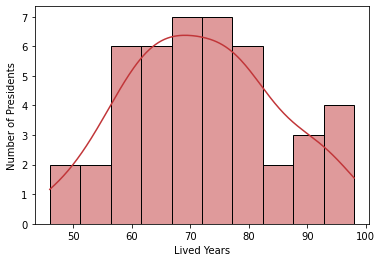

In [12]:
# Set the color palette to "RdBu"
sns.set_palette("RdBu")

# Plot the histogram with KDE (Kernel Density Estimation)
sns.histplot(df['lived_years'], kde=True, bins=10)

plt.xlabel('Lived Years')
plt.ylabel('Number of Presidents')
plt.show()


##### Plot 2: Frequency Distribution of Presidential Ages

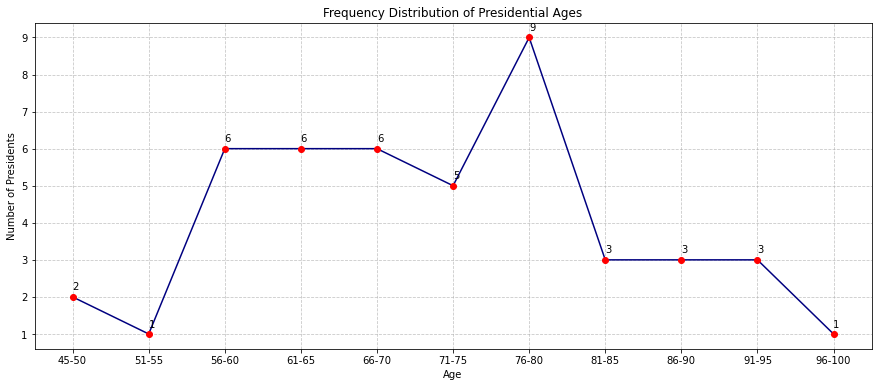

In [13]:
# Function to add label in the plot
def add_label(x, y):
    for x_val, y_val in zip(x, y):
        label = y_val
        plt.annotate(label, (x_val, y_val), textcoords="offset points", xytext=(3,7), ha='center')

# Create age range categories
df['age_range'] = pd.cut(df['lived_years'].astype(int), [45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 
                         labels=['45-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100'])

# Calculate the frequency distribution of age ranges
age_range_counts = df['age_range'].value_counts().sort_index().reset_index().rename(columns={'index': 'age_range', 'age_range': 'counts'})

# Extract x-axis and y-axis data
x_axis = list(age_range_counts['age_range'])
y_axis = list(age_range_counts['counts'])

# Plot the line chart
plt.figure(figsize=(15, 6))
plt.plot(x_axis, y_axis, color='navy', marker='o',  markerfacecolor='red', markeredgecolor='red')

# Add labels to data points
add_label(x_axis, y_axis)

plt.title('Frequency Distribution of Presidential Ages')
plt.xlabel('Age')
plt.ylabel('Number of Presidents')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
